In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# IRO TFA CCFE
# Import, Resize, Object, Trainable layer, Folders,Augmentation, Create model, Compile, Fit, Evaluate

IMAGE_SIZE =[224, 224]

vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet' , include_top = False)

In [4]:
for layers in vgg16.layers:
    layers.trainable = False

In [7]:
folders = glob('Cotton Disease/train/*')
folders

['Cotton Disease/train\\diseased cotton leaf',
 'Cotton Disease/train\\diseased cotton plant',
 'Cotton Disease/train\\fresh cotton leaf',
 'Cotton Disease/train\\fresh cotton plant']

In [6]:
len(folders)

4

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
x = Flatten()(vgg16.output)

In [17]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten_1')>

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

In [19]:
# Time for CCFE

model = Model(inputs=vgg16.input, outputs=prediction)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [23]:
test_set = train_datagen.flow_from_directory('Cotton Disease/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [26]:
hist = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 26s 425ms/step - loss: 0.1419 - accuracy: 0.9472 - val_loss: 0.2501 - val_accuracy: 0.8679
Epoch 2/10
61/61 [==============================] - 26s 425ms/step - loss: 0.1167 - accuracy: 0.9575 - val_loss: 0.2057 - val_accuracy: 0.9245
Epoch 3/10
61/61 [==============================] - 27s 442ms/step - loss: 0.1017 - accuracy: 0.9657 - val_loss: 0.1862 - val_accuracy: 0.9151
Epoch 4/10
61/61 [==============================] - 27s 444ms/step - loss: 0.0905 - accuracy: 0.9677 - val_loss: 0.1579 - val_accuracy: 0.9528
Epoch 5/10
61/61 [==============================] - 27s 436ms/step - loss: 0.0838 - accuracy: 0.9744 - val_loss: 0.1488 - val_accuracy: 0.9528
Epoch 6/10
61/61 [==============================] - 26s 431ms/step - loss: 0.0620 - accuracy: 0.9836 - val_loss: 0.1241 - val_accuracy: 0.9340
Epoch 7/10
61/61 [==============================] - 27s 437ms/step - loss: 0.0655 - accuracy: 0.9821 - val_loss: 0.1049 - val_accuracy: 0.9528

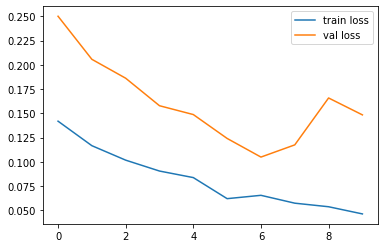

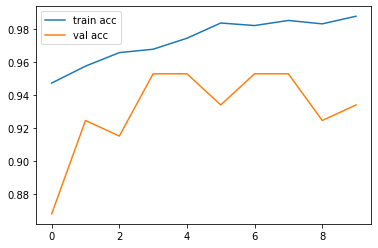

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

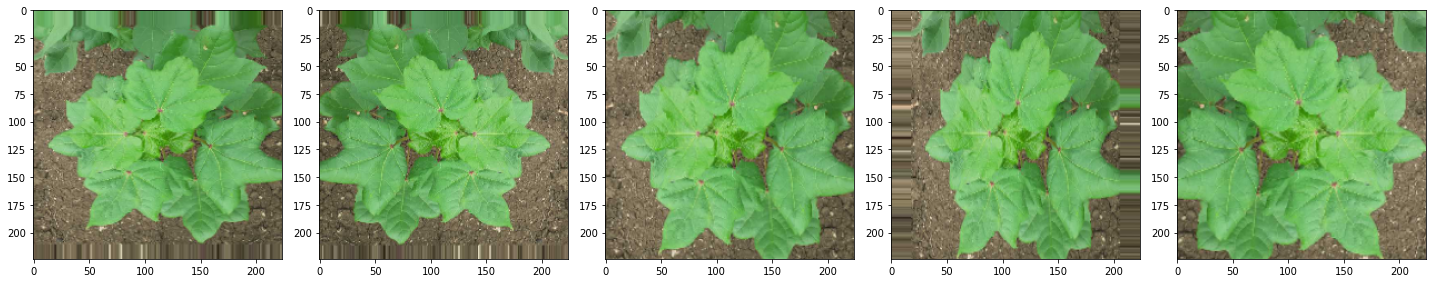

In [31]:
# Function to display images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [32]:
y_pred = model.predict(test_set)
y_pred

array([[9.22758889e-04, 8.80808756e-03, 3.46436900e-06, 9.90265667e-01],
       [1.63533085e-04, 9.99706447e-01, 5.12532461e-05, 7.87104582e-05],
       [1.15527806e-03, 2.96965914e-06, 9.98841703e-01, 1.13136132e-07],
       [4.73228720e-05, 9.99904871e-01, 1.34810170e-06, 4.63962351e-05],
       [3.52367788e-04, 7.90972471e-01, 6.44532905e-04, 2.08030671e-01],
       [1.30268454e-04, 9.99420524e-01, 1.26803541e-04, 3.22481501e-04],
       [9.98092830e-01, 3.51614199e-06, 1.86051475e-03, 4.30709988e-05],
       [5.89641240e-05, 9.22649633e-06, 9.99774277e-01, 1.57514572e-04],
       [6.25777990e-04, 1.26814097e-01, 2.13367515e-03, 8.70426476e-01],
       [1.47169922e-03, 3.87198641e-03, 1.70349367e-02, 9.77621436e-01],
       [1.07392652e-05, 6.20348273e-10, 9.99989271e-01, 1.40507564e-10],
       [9.99997377e-01, 7.25321513e-07, 1.89962759e-06, 8.67064376e-09],
       [1.01540059e-01, 8.64447057e-01, 5.00236498e-03, 2.90105604e-02],
       [8.40495154e-03, 7.28394151e-01, 2.56819674e

# Everything after this is for testing purposes

In [47]:
img=image.load_img('Cotton Disease/test/diseased cotton plant/dd (862)_iaip.jpg',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[ 67., 136.,  11.],
        [ 82., 143.,   4.],
        [101., 157.,   8.],
        ...,
        [134., 118.,  41.],
        [160., 137.,  69.],
        [144., 121.,  53.]],

       [[ 71., 136.,  18.],
        [ 85., 141.,  16.],
        [ 95., 147.,  13.],
        ...,
        [135., 124.,  32.],
        [147., 149.,  52.],
        [129., 131.,  34.]],

       [[ 53., 113.,   0.],
        [ 97., 147.,  36.],
        [ 95., 139.,  24.],
        ...,
        [167., 170.,  55.],
        [189., 221.,  86.],
        [193., 225.,  90.]],

       ...,

       [[ 63.,  50.,  16.],
        [ 67.,  54.,  20.],
        [ 71.,  58.,  24.],
        ...,
        [111.,  85.,  24.],
        [129., 101.,  38.],
        [146., 118.,  55.]],

       [[ 54.,  48.,  16.],
        [ 59.,  53.,  21.],
        [ 62.,  56.,  24.],
        ...,
        [132., 100.,  39.],
        [141., 109.,  52.],
        [149., 117.,  60.]],

       [[ 57.,  51.,  19.],
        [ 58.,  52.,  20.],
        [ 59.,  

In [48]:
x.shape

(224, 224, 3)

In [49]:
x = x/255
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [50]:
model.predict(img_data)

array([[9.9991739e-01, 5.6300481e-12, 3.5048543e-13, 8.2637467e-05]],
      dtype=float32)

In [51]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([0], dtype=int64)